# Discussion - Pearson Correlation

In this example, we will be using [the Wine Dataset from UCI](https://archive.ics.uci.edu/ml/datasets/wine). <br >
The data is the results of a chemical analysis of wines grown in the same region in Italy. <br >
There are 13 different measurements taken from 3 types of wines(cultivators/grapevines).


### Goals
- Pearson Correlation
- As a distance measure in clustering
- Connection with Euclidean distance 
- Spearman Correlation

Instruction: Yun-Hsin Kuo

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine
data, classes = load_wine(return_X_y=True, as_frame=True) 
data['class'] = classes
df = data.copy()
print(df['class'].value_counts())

1    71
0    59
2    48
Name: class, dtype: int64


## Pearson Correlation

This is a statistical technique that measures the linear relationship between two variables (In this context, by variable we usually mean "attribute/feature"). <br >
The **absolute value being close to 1** indicates the pair shares a **strong linear** relationship. <br >
On the other hand, the value being close to 0 indicates there is probably **no linear relationship** between this pair. <br >

In [2]:
from IPython.display import Image
Image(url='https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/800px-Correlation_examples2.svg.png', width=600)

Assume we have two attributes, $x$ and $y$, and the subscript indicates the $i^\text{th}$ instance in the dataset:

$CORR(x,y) = \displaystyle \dfrac{\sum_{i=1}^N (x_i - \bar x)(y_i - \bar y) }{\sqrt{\sum_{i=1}^N (x_i - \bar x)^2}\sqrt{\sum_{i=1}^N (y_i - \bar y)^2}}$

where $\bar x$ and $\bar y$ are the mean of these attributes, respectively. 

---

The **covariance** between attribute $x$ and $y$ is:

$COV(x, y) = \displaystyle \dfrac{1}{N} \sum_{i=1}^N (x_i - \bar x)(y_i - \bar y)$

The covariance between $x$ and itself, i.e., $COV(x,x)$, is the variance of $x$, $VAR(x)$, or **the square of the standard deviation**, $\sigma^2 (x)$:

$\sigma(x) = \displaystyle \sqrt{ \dfrac{1}{N} \sum_{i=1}^N (x_i - \bar x)^2 }$

So...the correlation can be rewritten as:

$CORR(x,y) = \displaystyle \dfrac{COV(x, y)}{\sigma(x) \cdot \sigma(y)}$



### Calling Common Methods

In [4]:
corr = df.drop(columns=['class']).corr() 
corr.style.set_precision(3).background_gradient(cmap='RdBu', vmin=-1, vmax=1)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
alcohol,1.000,0.094,0.212,-0.310,0.271,0.289,0.237,-0.156,0.137,0.546,-0.072,0.072,0.644
malic_acid,0.094,1.000,0.164,0.289,-0.055,-0.335,-0.411,0.293,-0.221,0.249,-0.561,-0.369,-0.192
ash,0.212,0.164,1.000,0.443,0.287,0.129,0.115,0.186,0.010,0.259,-0.075,0.004,0.224
alcalinity_of_ash,-0.310,0.289,0.443,1.000,-0.083,-0.321,-0.351,0.362,-0.197,0.019,-0.274,-0.277,-0.441
magnesium,0.271,-0.055,0.287,-0.083,1.000,0.214,0.196,-0.256,0.236,0.200,0.055,0.066,0.393
total_phenols,0.289,-0.335,0.129,-0.321,0.214,1.000,0.865,-0.450,0.612,-0.055,0.434,0.700,0.498
flavanoids,0.237,-0.411,0.115,-0.351,0.196,0.865,1.000,-0.538,0.653,-0.172,0.543,0.787,0.494
nonflavanoid_phenols,-0.156,0.293,0.186,0.362,-0.256,-0.450,-0.538,1.000,-0.366,0.139,-0.263,-0.503,-0.311
proanthocyanins,0.137,-0.221,0.010,-0.197,0.236,0.612,0.653,-0.366,1.000,-0.025,0.296,0.519,0.330
color_intensity,0.546,0.249,0.259,0.019,0.200,-0.055,-0.172,0.139,-0.025,1.000,-0.522,-0.429,0.316


### Calling Covarianace and Standard Deviation

In [5]:
cov = df.drop(columns=['class']).cov()
std = df.drop(columns=['class']).std()

corr_2 = cov.div(std, axis=0).div(std, axis=1)
corr_2.style.set_precision(3).background_gradient(cmap='RdBu', vmin=-1, vmax=1)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
alcohol,1.000,0.094,0.212,-0.310,0.271,0.289,0.237,-0.156,0.137,0.546,-0.072,0.072,0.644
malic_acid,0.094,1.000,0.164,0.289,-0.055,-0.335,-0.411,0.293,-0.221,0.249,-0.561,-0.369,-0.192
ash,0.212,0.164,1.000,0.443,0.287,0.129,0.115,0.186,0.010,0.259,-0.075,0.004,0.224
alcalinity_of_ash,-0.310,0.289,0.443,1.000,-0.083,-0.321,-0.351,0.362,-0.197,0.019,-0.274,-0.277,-0.441
magnesium,0.271,-0.055,0.287,-0.083,1.000,0.214,0.196,-0.256,0.236,0.200,0.055,0.066,0.393
total_phenols,0.289,-0.335,0.129,-0.321,0.214,1.000,0.865,-0.450,0.612,-0.055,0.434,0.700,0.498
flavanoids,0.237,-0.411,0.115,-0.351,0.196,0.865,1.000,-0.538,0.653,-0.172,0.543,0.787,0.494
nonflavanoid_phenols,-0.156,0.293,0.186,0.362,-0.256,-0.450,-0.538,1.000,-0.366,0.139,-0.263,-0.503,-0.311
proanthocyanins,0.137,-0.221,0.010,-0.197,0.236,0.612,0.653,-0.366,1.000,-0.025,0.296,0.519,0.330
color_intensity,0.546,0.249,0.259,0.019,0.200,-0.055,-0.172,0.139,-0.025,1.000,-0.522,-0.429,0.316


### Common usages include
 - Find what attributes have strong correlation with the target attribute to build a prediction model
 - Find which pair of attributes may describe the same information and one of them is thus redundant.
 
Formally I'd drop a keyword, **collinearity**, to summarize these two points. <br >
The first is the collinearity between an independent variable and the dependent variable. <br >
The second is the collinearity among independent variables.

## Pearson in k-Means Clustering

In k-means, we consider $\displaystyle \sum_{i=1}^{N} \min_{\mu_j \in C} (|| x_i - \mu_j||)^2$ in the objective. <br >
It means we want to minimize the within-cluster variance. <br >
On the other hand, at the same time, you can say we implicitly consider the squared Euclidean distances to the centroid. <br >
This is why scikit-learn does not offer other distance metrics. See more in [here](https://stats.stackexchange.com/questions/81481/why-does-k-means-clustering-algorithm-use-only-euclidean-distance-metric). <br >
But there are still other implementions that offer other distance metrics.

In the following, we only consider two attributes in our dataset and talk about why **Pearson should not be used in k-Means**.

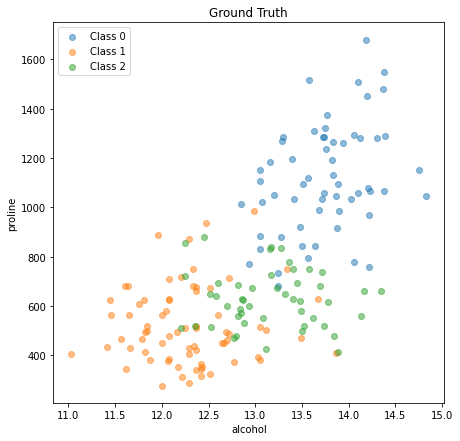

In [6]:
import matplotlib.pyplot as plt

x_attr = 'alcohol'
y_attr = 'proline'
attrs = [x_attr, y_attr]
#X = df.drop(columns=['class']) 
X = df[attrs]

def plotKmeansOnPair(data, x_label, y_label, cluster_labels, centroids=None, title=''):
    colors = ['tab:blue', 'tab:orange', 'tab:green']
    plt.figure(figsize=(7, 7))
    for c in np.unique(np.asarray(cluster_labels)):
        plt.scatter(data.loc[(cluster_labels == c), x_label], data.loc[(cluster_labels == c), y_label], c=colors[c], alpha=0.5, label=f'Class {c}')
    if centroids is not None:
        plt.scatter(centroids.loc[:, x_label], centroids.loc[:, y_label], c='tab:red', alpha=0.7, label='centroids')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.legend()
    plt.show()
    
plotKmeansOnPair(X, x_attr, y_attr, classes, title='Ground Truth')

### Scikit-learn K-means

Only considers **Euclidean distance**.

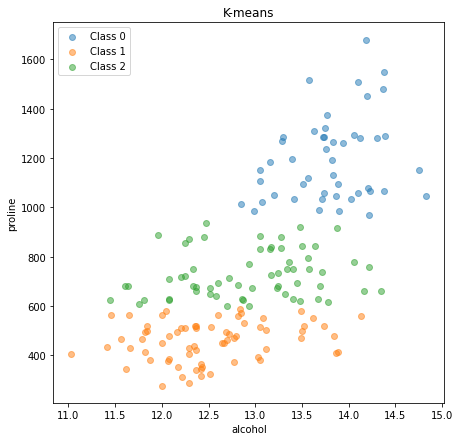

In [7]:
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report

k = 3
kmeans = KMeans(n_clusters=k, init='random', random_state=21)
#kmeans = KMeans(n_clusters=k, init='k-means++')
sklabels = kmeans.fit_predict(np.asarray(X))

plotKmeansOnPair(df, x_attr, y_attr, sklabels, title='K-means')

### Pyclustering K-means

[Pyclustering](https://github.com/annoviko/pyclustering) provides different clustering methods with distance metrics.
Can find an [example](https://www.kaggle.com/arushchillar/kmeans-clustering-using-different-distance-metrics) here.

[[0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 22, 23, 26, 27, 29, 30, 31, 32, 33, 34, 37, 38, 41, 42, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 73], [59, 61, 63, 64, 66, 67, 71, 72, 75, 76, 77, 79, 80, 83, 84, 85, 86, 87, 90, 91, 92, 93, 94, 97, 99, 101, 102, 103, 105, 106, 107, 108, 110, 111, 113, 114, 115, 116, 117, 118, 119, 121, 122, 123, 124, 125, 126, 127, 128, 129, 131, 132, 137, 138, 139, 142, 143, 146, 149, 150, 151, 152, 156, 160, 162, 165, 170, 171, 177], [4, 19, 20, 21, 24, 25, 28, 35, 36, 39, 40, 43, 44, 60, 62, 65, 68, 69, 70, 74, 78, 81, 82, 88, 89, 95, 96, 98, 100, 104, 109, 112, 120, 130, 133, 134, 135, 136, 140, 141, 144, 145, 147, 148, 153, 154, 155, 157, 158, 159, 161, 163, 164, 166, 167, 168, 169, 172, 173, 174, 175, 176]]
[0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 2, 2,

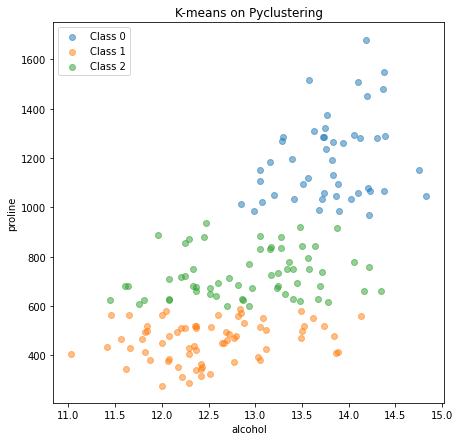

In [8]:
from pyclustering.cluster.kmeans import kmeans
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer, random_center_initializer
from pyclustering.cluster.encoder import type_encoding
from pyclustering.cluster.encoder import cluster_encoder

centroids = random_center_initializer(np.asarray(X), k, random_state=21).initialize()
#centroids = kmeans_plusplus_initializer(np.asarray(X), k).initialize()
pyKmeans = kmeans(np.asarray(X), centroids)
pyKmeans.process()
print(pyKmeans.get_clusters())
pyClusters = pyKmeans.get_clusters()
pyEncoding = pyKmeans.get_cluster_encoding()
pyLabels = cluster_encoder(pyEncoding, pyClusters, X).set_encoding(0).get_clusters()
print(pyLabels)
final_centroids = np.asarray(pyKmeans.get_centers())

plotKmeansOnPair(df, x_attr, y_attr, pyLabels, title='K-means on Pyclustering')

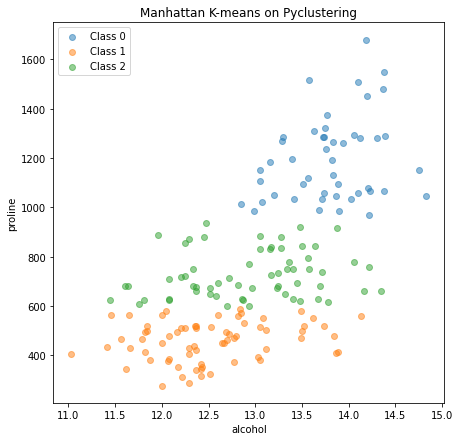

In [9]:
from pyclustering.utils.metric import distance_metric, type_metric

centroids = random_center_initializer(np.asarray(X), k, random_state=21).initialize()
#centroids = kmeans_plusplus_initializer(np.asarray(X), k).initialize()
pyKmeans = kmeans(np.asarray(X), centroids, metric=distance_metric(type_metric.MANHATTAN))
pyKmeans.process()
pyClusters = pyKmeans.get_clusters()
pyEncoding = pyKmeans.get_cluster_encoding()
pyLabels_m = cluster_encoder(pyEncoding, pyClusters, X).set_encoding(0).get_clusters()

plotKmeansOnPair(df, x_attr, y_attr, pyLabels_m, title='Manhattan K-means on Pyclustering')

## Pearson Distance

 This is a correlation-based distance where we consider two instances are similar with they are highly correlated. <br >
 
 $\text{dist}_p (x, y) = 1 - CORR(x, y)$
 
 Note that this is a commonly used equation when we'd like to turn a similarity measure into a dissimilarity(distance). <br >
 This results in a range of 0 to 2. <br >
 So there are other variants that takes the absolute value of correlation when computing the distance.

In [10]:
instance_corr = df.drop(columns=['class']).T.corr()
pearson_dist = 1 - instance_corr
pearson_dist

,0,1,2,3,4,5,6,7,8,9,...,168,169,170,171,172,173,174,175,176,177
0,0.000000,0.000285,0.000584,0.000904,0.000869,0.000860,0.000985,0.000322,0.000351,0.000334,...,0.000351,0.001846,0.002456,0.002227,0.000298,0.000138,0.000251,0.000343,0.000318,0.001599
1,0.000285,0.000000,0.000070,0.000182,0.002130,0.000160,0.000216,0.000008,0.000009,0.000015,...,0.001140,0.003517,0.004371,0.004008,0.001020,0.000635,0.000942,0.001210,0.001171,0.003112
2,0.000584,0.000070,0.000000,0.000043,0.002785,0.000038,0.000061,0.000041,0.000037,0.000039,...,0.001551,0.004284,0.005271,0.004822,0.001424,0.000952,0.001322,0.001708,0.001663,0.003790
3,0.000904,0.000182,0.000043,0.000000,0.003485,0.000001,0.000004,0.000150,0.000136,0.000147,...,0.002092,0.005151,0.006222,0.005723,0.001931,0.001380,0.001826,0.002250,0.002201,0.004610
4,0.000869,0.002130,0.002785,0.003485,0.000000,0.003408,0.003639,0.002197,0.002275,0.002214,...,0.000252,0.000217,0.000418,0.000409,0.000329,0.000554,0.000325,0.000177,0.000176,0.000206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.000138,0.000635,0.000952,0.001380,0.000554,0.001339,0.001473,0.000648,0.000685,0.000642,...,0.000090,0.001222,0.001787,0.001519,0.000064,0.000000,0.000038,0.000144,0.000139,0.000961
174,0.000251,0.000942,0.001322,0.001826,0.000325,0.001779,0.001936,0.000957,0.001006,0.000951,...,0.000013,0.000854,0.001340,0.001116,0.000020,0.000038,0.000000,0.000063,0.000057,0.000640
175,0.000343,0.001210,0.001708,0.002250,0.000177,0.002191,0.002382,0.001259,0.001316,0.001260,...,0.000052,0.000624,0.001018,0.000846,0.000058,0.000144,0.000063,0.000000,0.000003,0.000494
176,0.000318,0.001171,0.001663,0.002201,0.000176,0.002142,0.002331,0.001219,0.001275,0.001220,...,0.000045,0.000648,0.001043,0.000874,0.000053,0.000139,0.000057,0.000003,0.000000,0.000514


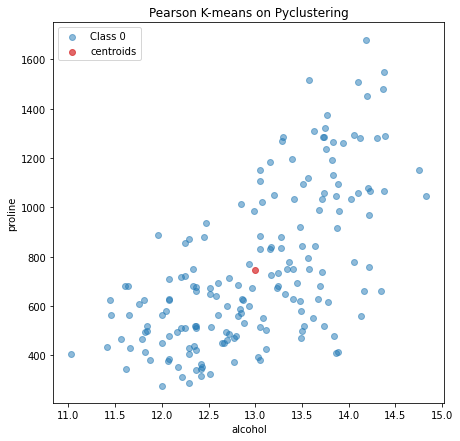

In [11]:
from scipy.stats import pearsonr
def pearson_distance(point1, point2):
    corr, _ = pearsonr(point1, point2) # p-value
    return 1 - corr

# NOTE that there are only 2 attributes in our dataset.

centroids = random_center_initializer(np.asarray(X), k, random_state=21).initialize()
#centroids = kmeans_plusplus_initializer(np.asarray(X), k).initialize()
pyKmeans = kmeans(np.asarray(X), centroids, metric=distance_metric(type_metric.USER_DEFINED, func=pearson_distance))
pyKmeans.process()
pyClusters = pyKmeans.get_clusters()
pyEncoding = pyKmeans.get_cluster_encoding()
pyLabels = cluster_encoder(pyEncoding, pyClusters, X).set_encoding(0).get_clusters()
final_centroids = np.asarray(pyKmeans.get_centers())

plotKmeansOnPair(X, x_attr, y_attr, pyLabels, pd.DataFrame(final_centroids, columns=attrs), title='Pearson K-means on Pyclustering')

### Difference between Euclidean distance
Pearson correlation won't reflect the geometric distance between two objects.

In [12]:
Image(url='https://upload.wikimedia.org/wikipedia/commons/thumb/5/55/Euclidean_distance_2d.svg/2560px-Euclidean_distance_2d.svg.png', width=400)

### So don't use Pearson distance in K-means :)

### What if we include more attributes?
Note that we haven't talked about visualizing high-dimensional data, so we still stick with the original plot as we only wanna do comparison. 

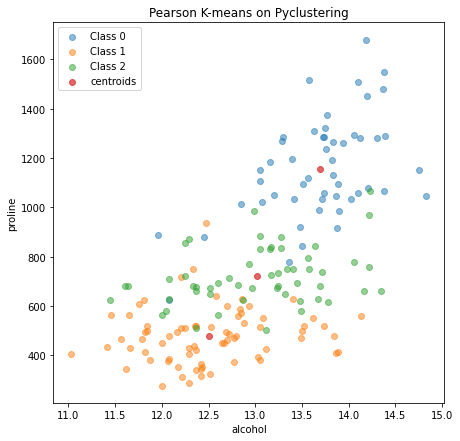

In [13]:
X = df.drop(columns=['class']) 
centroids = random_center_initializer(np.asarray(X), k, random_state=21).initialize()
#centroids = kmeans_plusplus_initializer(np.asarray(X), k).initialize()
pyKmeans = kmeans(np.asarray(X), centroids, metric=distance_metric(type_metric.USER_DEFINED, func=pearson_distance))
pyKmeans.process()
pyClusters = pyKmeans.get_clusters()
pyEncoding = pyKmeans.get_cluster_encoding()
pyLabels = cluster_encoder(pyEncoding, pyClusters, X).set_encoding(0).get_clusters()
final_centroids = pd.DataFrame(pyKmeans.get_centers(), columns=X.columns).loc[:, [x_attr, y_attr]]

plotKmeansOnPair(X, x_attr, y_attr, pyLabels, final_centroids, title='Pearson K-means on Pyclustering')

**Why it somehow makes sense this time?**

### Connection between Pearson Correlation and Euclidean Distance

In clustering, we grab a pair of instances and calculate their distance based on their features. <br >
So here, I changed the notation from N to M.

Recall Pearson correlation is:

$CORR(x,y) = \displaystyle \dfrac{COV(x, y)}{\sigma(x) \cdot \sigma(y)}$

where $COV(x, y)$ is the **covariance** between attribute $x$ and $y$:

$COV(x, y) = \displaystyle \dfrac{1}{M} \sum_{i=1}^M (x_i - \bar x)(y_i - \bar y)$

$\sigma(x)$ is the standard deviation of attribute $x$.

$\sigma(x) = \displaystyle \sqrt{ \dfrac{1}{M} \sum_{i=1}^M (x_i - \bar x)^2 }$


---

**When we have the standardized data**, their mean (e.g., $\bar x$ and $\bar y$) are 0 and standard deviation (e.g., $\sigma (x)$ and $\sigma (y)$) are 1.

Therefore, the **Pearson Correlation** will now becomes...

$CORR(x,y) = \displaystyle \dfrac{\dfrac{1}{M}\sum_{i=1}^M (x_i - \bar x)(y_i - \bar y) }{\sigma(x) \cdot \sigma(y)} = \dfrac{\dfrac{1}{M}\sum_{i=1}^M (x_i - 0)(y_i - 0)}{1 \cdot 1} = \dfrac{\sum_{i=1}^M x_i y_i}{M}$

On the other hand, for **Euclidean distance**,

$\text{dist}_e^2(x, y) = \displaystyle \sum_{i=1}^M (x_i - y_i)^2 = \sum_{i=1}^M (x_i^2 - 2x_i y_i + y_i^2) $

Because $\sigma(x) = \displaystyle \sqrt{ \dfrac{1}{M} \sum_{i=1}^M (x_i - \bar x)^2 } = \sqrt{ \dfrac{1}{M} \sum_{i=1}^M x_i^2 } = 1$, it implies that $\sum_{i=1}^M x_i^2 = M$

And so...

$\text{dist}_e^2(x, y) = \displaystyle \sum_{i=1}^M (x_i^2 - 2x_i y_i + y_i^2) = M + M - 2 \sum_{i=1}^M x_i y_i = 2M - 2M \cdot CORR(x,y) $


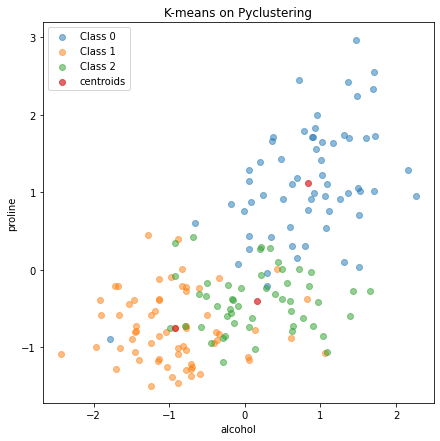

In [14]:
from sklearn import preprocessing

X = df.drop(columns=['class']) 
scaler = preprocessing.StandardScaler()
Z = scaler.fit_transform(X)

centroids = random_center_initializer(np.asarray(Z), k, random_state=21).initialize()
#centroids = kmeans_plusplus_initializer(np.asarray(X), k).initialize()

pyKmeans = kmeans(np.asarray(Z), centroids)
pyKmeans.process()

pyClusters = pyKmeans.get_clusters()
pyEncoding = pyKmeans.get_cluster_encoding()
pyLabels = cluster_encoder(pyEncoding, pyClusters, Z).set_encoding(0).get_clusters()
final_centroids = pd.DataFrame(pyKmeans.get_centers(), columns=X.columns).loc[:, [x_attr, y_attr]]

plotKmeansOnPair(pd.DataFrame(Z, columns=X.columns), x_attr, y_attr, pyLabels, final_centroids, title='K-means on Pyclustering')

### Again, don't use Pearson Distance in k-Means :)

### So when should we use Pearson Correlation in what methods?

When you want to consider co-occurrences of attributes, e.g. gene expression analysis, you can build a distance matrix and did **hierarchical clustering**. <br >
Here is [a concrete example of gene analysis](http://pedagogix-tagc.univ-mrs.fr/courses/ASG1/practicals/distances/distances.html#hierarchical_clustering_with_hclust) in R.

In [15]:
Image(url='https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Gene_co-expression_network_construction_steps.png/720px-Gene_co-expression_network_construction_steps.png', width=600)

### Non-linear relationship?

Pearson correlation only measures the strength of linear relationship between 2 points. <br >
But what if it's non-linear?

**Spearman correlation** measures the [monotonic relationship](https://en.wikipedia.org/wiki/Monotonic_function) between two points, which to some extent takes care of non-linear relationship. <br >
Specifically, we can say this is the Pearson correlation between **ranked** values. <br >
Because of the ranking, Spearman is also less sensitive to outliers compared to Pearson.


For more details, definitely check out [wikipedia](https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient) and [this one](https://towardsdatascience.com/clearly-explained-pearson-v-s-spearman-correlation-coefficient-ada2f473b8).

**Troubleshooting**

In [26]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install pyclustering 